# LV2.

튜플

2019 카카오 개발자 겨울 인턴십

https://school.programmers.co.kr/learn/courses/30/lessons/64065

**문제 설명**

    셀수있는 수량의 순서있는 열거 또는 어떤 순서를 따르는 요소들의 모음을 튜플(tuple)이라고 합니다. n개의 요소를 가진 튜플을 n-튜플(n-tuple)이라고 하며, 다음과 같이 표현할 수 있습니다.

    (a1, a2, a3, ..., an)
    튜플은 다음과 같은 성질을 가지고 있습니다.

    중복된 원소가 있을 수 있습니다. ex : (2, 3, 1, 2)
    원소에 정해진 순서가 있으며, 원소의 순서가 다르면 서로 다른 튜플입니다. ex : (1, 2, 3) ≠ (1, 3, 2)
    튜플의 원소 개수는 유한합니다.
    원소의 개수가 n개이고, 중복되는 원소가 없는 튜플 (a1, a2, a3, ..., an)이 주어질 때(단, a1, a2, ..., an은 자연수), 이는 다음과 같이 집합 기호 '{', '}'를 이용해 표현할 수 있습니다.

    {{a1}, {a1, a2}, {a1, a2, a3}, {a1, a2, a3, a4}, ... {a1, a2, a3, a4, ..., an}}
    예를 들어 튜플이 (2, 1, 3, 4)인 경우 이는

    {{2}, {2, 1}, {2, 1, 3}, {2, 1, 3, 4}}
    와 같이 표현할 수 있습니다. 이때, 집합은 원소의 순서가 바뀌어도 상관없으므로

    {{2}, {2, 1}, {2, 1, 3}, {2, 1, 3, 4}}
    {{2, 1, 3, 4}, {2}, {2, 1, 3}, {2, 1}}
    {{1, 2, 3}, {2, 1}, {1, 2, 4, 3}, {2}}
    는 모두 같은 튜플 (2, 1, 3, 4)를 나타냅니다.

    특정 튜플을 표현하는 집합이 담긴 문자열 s가 매개변수로 주어질 때, s가 표현하는 튜플을 배열에 담아 return 하도록 solution 함수를 완성해주세요.
    
    
**제한 사항**

    s의 길이는 5 이상 1,000,000 이하입니다.
    s는 숫자와 '{', '}', ',' 로만 이루어져 있습니다.
    숫자가 0으로 시작하는 경우는 없습니다.
    s는 항상 중복되는 원소가 없는 튜플을 올바르게 표현하고 있습니다.
    s가 표현하는 튜플의 원소는 1 이상 100,000 이하인 자연수입니다.
    return 하는 배열의 길이가 1 이상 500 이하인 경우만 입력으로 주어집니다.
    
**입출력 예**

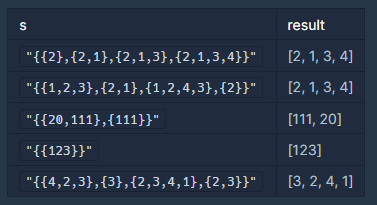

In [185]:
def solution(s):
    answer = []
    s_lst = [string.replace('{','').replace('}','') for string in s.split('},')]
    s_lst.sort(key=len)
    
    for idx in s_lst:
        idx_lst = list(map(int, idx.split(',')))
        while len(idx_lst)!=0:
            for i in idx_lst:
                if i not in answer:
                    answer.append(i)
                    idx_lst.remove(i)
                else:
                    idx_lst.remove(i)
    return answer

In [186]:
print(solution("{{2},{2,1},{2,1,3},{2,1,3,4}}"))
print(solution("{{1,2,3},{2,1},{1,2,4,3},{2}}"))
print(solution("{{20,111},{111}}"))
print(solution("{{123}}"))
print(solution("{{4,2,3},{3},{2,3,4,1},{2,3}}"))

[2, 1, 3, 4]
[2, 1, 3, 4]
[111, 20]
[123]
[3, 2, 4, 1]


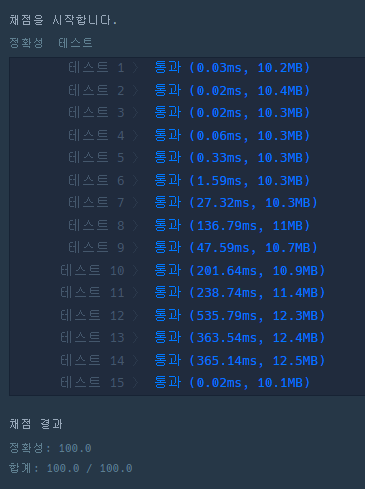

**다른 사람 풀이**

    - 사실 정규표현식을 이용해서 해보면 어떨까 하는 생각이 스쳐지나가긴 했는데...
      이걸 구현하네... 좋겠다 
      
      
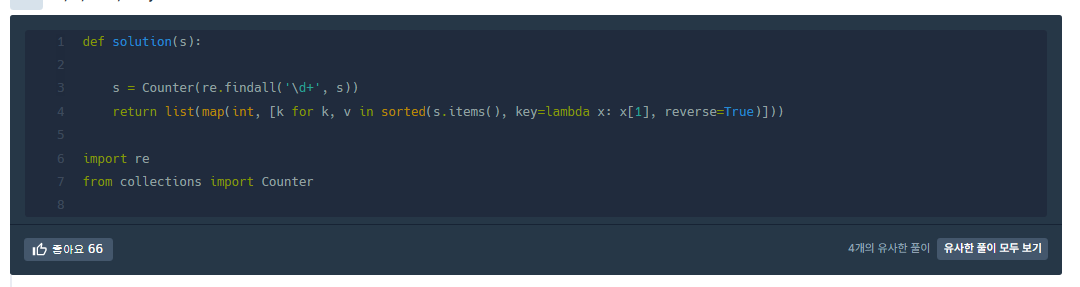      

    - 이 풀이 좋은거 같음... 정규표현식으로 찾고 Counter 함수를 통해서 가장 많이 나온 순서대로 리스트에 담는거.. 이거 예쁜 코드

In [187]:
import re
from collections import Counter

In [188]:
s = "{{2},{2,1},{2,1,3},{2,1,3,4}}"

In [190]:
re.findall('\d+',s)

['2', '2', '1', '2', '1', '3', '2', '1', '3', '4']

In [191]:
counter = Counter(re.findall('\d+', s))
counter


Counter({'2': 4, '1': 3, '3': 2, '4': 1})

In [197]:
list(map(int, [k for k,v in sorted(counter.items(), key= lambda x: x[1], reverse=True)]))

[2, 1, 3, 4]

# LV2.

[3차] 파일명 정렬

2018 KAKAO BLIND RECRUITMENT

https://school.programmers.co.kr/learn/courses/30/lessons/17686

**문제 설명**

    세 차례의 코딩 테스트와 두 차례의 면접이라는 기나긴 블라인드 공채를 무사히 통과해 카카오에 입사한 무지는 파일 저장소 서버 관리를 맡게 되었다.

    저장소 서버에는 프로그램의 과거 버전을 모두 담고 있어, 이름 순으로 정렬된 파일 목록은 보기가 불편했다. 파일을 이름 순으로 정렬하면 나중에 만들어진 ver-10.zip이 ver-9.zip보다 먼저 표시되기 때문이다.

    버전 번호 외에도 숫자가 포함된 파일 목록은 여러 면에서 관리하기 불편했다. 예컨대 파일 목록이 ["img12.png", "img10.png", "img2.png", "img1.png"]일 경우, 일반적인 정렬은 ["img1.png", "img10.png", "img12.png", "img2.png"] 순이 되지만, 숫자 순으로 정렬된 ["img1.png", "img2.png", "img10.png", img12.png"] 순이 훨씬 자연스럽다.

    무지는 단순한 문자 코드 순이 아닌, 파일명에 포함된 숫자를 반영한 정렬 기능을 저장소 관리 프로그램에 구현하기로 했다.

    소스 파일 저장소에 저장된 파일명은 100 글자 이내로, 영문 대소문자, 숫자, 공백(" "), 마침표("."), 빼기 부호("-")만으로 이루어져 있다. 파일명은 영문자로 시작하며, 숫자를 하나 이상 포함하고 있다.

    파일명은 크게 HEAD, NUMBER, TAIL의 세 부분으로 구성된다.

    HEAD는 숫자가 아닌 문자로 이루어져 있으며, 최소한 한 글자 이상이다.
    NUMBER는 한 글자에서 최대 다섯 글자 사이의 연속된 숫자로 이루어져 있으며, 앞쪽에 0이 올 수 있다. 0부터 99999 사이의 숫자로, 00000이나 0101 등도 가능하다.
    TAIL은 그 나머지 부분으로, 여기에는 숫자가 다시 나타날 수도 있으며, 아무 글자도 없을 수 있다.
    
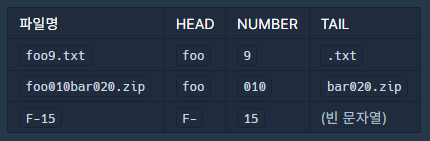


    파일명을 세 부분으로 나눈 후, 다음 기준에 따라 파일명을 정렬한다.

    파일명은 우선 HEAD 부분을 기준으로 사전 순으로 정렬한다. 이때, 문자열 비교 시 대소문자 구분을 하지 않는다. MUZI와 muzi, MuZi는 정렬 시에 같은 순서로 취급된다.
    파일명의 HEAD 부분이 대소문자 차이 외에는 같을 경우, NUMBER의 숫자 순으로 정렬한다. 9 < 10 < 0011 < 012 < 13 < 014 순으로 정렬된다. 숫자 앞의 0은 무시되며, 012와 12는 정렬 시에 같은 같은 값으로 처리된다.
    두 파일의 HEAD 부분과, NUMBER의 숫자도 같을 경우, 원래 입력에 주어진 순서를 유지한다. MUZI01.zip과 muzi1.png가 입력으로 들어오면, 정렬 후에도 입력 시 주어진 두 파일의 순서가 바뀌어서는 안 된다.
    무지를 도와 파일명 정렬 프로그램을 구현하라.
    
    
**입력 형식**

    입력으로 배열 files가 주어진다.

    files는 1000 개 이하의 파일명을 포함하는 문자열 배열이다.
    각 파일명은 100 글자 이하 길이로, 영문 대소문자, 숫자, 공백(" "), 마침표("."), 빼기 부호("-")만으로 이루어져 있다. 파일명은 영문자로 시작하며, 숫자를 하나 이상 포함하고 있다.
    중복된 파일명은 없으나, 대소문자나 숫자 앞부분의 0 차이가 있는 경우는 함께 주어질 수 있다. (muzi1.txt, MUZI1.txt, muzi001.txt, muzi1.TXT는 함께 입력으로 주어질 수 있다.)
    
    
**출력 형식**

    위 기준에 따라 정렬된 배열을 출력한다.


**입출력 예제**

    입력: ["img12.png", "img10.png", "img02.png", "img1.png", "IMG01.GIF", "img2.JPG"]
    출력: ["img1.png", "IMG01.GIF", "img02.png", "img2.JPG", "img10.png", "img12.png"]

    입력: ["F-5 Freedom Fighter", "B-50 Superfortress", "A-10 Thunderbolt II", "F-14 Tomcat"]
    출력: ["A-10 Thunderbolt II", "B-50 Superfortress", "F-5 Freedom Fighter", "F-14 Tomcat"]